In [131]:
from scipy.spatial.transform import Rotation
import numpy as np
import seaborn as sns
import scipy
import pathlib
import h5py

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.stats import median_absolute_deviation as mad_
from astropy.coordinates import CartesianRepresentation, SphericalRepresentation
import gala.dynamics as gd
import gala.coordinates as gc
from mwlmc import model as mwlmc_model
Model = mwlmc_model.MWLMC()
import yaml

import matplotlib
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"
plt.style.use('my_standard.mplstyle')

galcen_v_sun = (11.1, 245, 7.3)*u.km/u.s
galcen_distance = 8.249*u.kpc

Initialising MW ... 
sphcoefs::read_coef_file: reading coefficients from file . . . success!!
Initialising LMC ... 
sphcoefs::read_coef_file: reading coefficients from file . . . success!!
Initialising MW disc ... 
cylcoefs::read_simple_coef_file: reading coefficients from file . . . success!!


sphcache::read_sph_cache: trying to read cached table . . . success!!
sphcache::read_sph_cache: trying to read cached table . . . success!!
cylcache::read_cyl_cache: trying to read cached table . . . success!!


In [132]:
def orbpole(xs,vs):
    uu = np.cross(xs, vs)
    uumag = np.linalg.norm(uu)
    u = uu.T/uumag
    b = np.arcsin(u[2])
    sinl = u[1]/np.cos(b)
    cosl = u[0]/np.cos(b)
    ll = np.arctan2(sinl, cosl)
    gl = np.degrees(ll)
    gb = np.degrees(b)
    return gl, gb    

def orbpole_singlevec(u):
    b = np.arcsin(u[2])
    sinl = u[1]/np.cos(b)
    cosl = u[0]/np.cos(b)
    ll = np.arctan2(sinl, cosl)
    gl = np.degrees(ll)
    gb = np.degrees(b)
    return gl, gb  

In [133]:
lmc_xs, lmc_vs = Model.expansion_centres(0.)[6:9], Model.expansion_centre_velocities(0.)[6:9]
disc_xs, disc_vs = Model.expansion_centres(0.)[:3], Model.expansion_centre_velocities(0.)[:3]

lmc_lpole, lmc_bpole = orbpole(np.array(lmc_xs), np.array(lmc_vs))
disc_lpole, disc_bpole = orbpole(np.array(disc_xs), np.array(disc_vs))
com_lpole, com_bpole = orbpole_singlevec(disc_xs)

def rotation_matrix_from_vectors(v1, v2):
    # Normalize the vectors
    v1 = v1 / np.linalg.norm(v1)
    v2 = v2 / np.linalg.norm(v2)
    
    # Calculate the cosine and sine of the angle between the vectors
    cos_theta = np.dot(v1, v2)
    sin_theta = np.cross(v1, v2)
    
    # Construct the rotation matrix
    R = np.array([[cos_theta, -sin_theta],
                  [sin_theta, cos_theta]])
    return R

# Example usage
v1_lmc = np.array([lmc_lpole, lmc_bpole])
v1_disc = np.array([disc_lpole, disc_bpole])
v1_com = np.array([com_lpole, com_bpole])
v2 = np.array([0, 90])

rotation_matrix_lmc = rotation_matrix_from_vectors(v1_lmc, v2)
rotation_matrix_disc = rotation_matrix_from_vectors(v1_disc, v2)
rotation_matrix_com = rotation_matrix_from_vectors(v1_com, v2)

rotation_matrix_lmc, rotation_matrix_disc, rotation_matrix_com

(array([[-0.02130971, -0.99977292],
        [ 0.99977292, -0.02130971]]),
 array([[-0.9850518 ,  0.17225841],
        [-0.17225841, -0.9850518 ]]),
 array([[-0.56870386, -0.82254235],
        [ 0.82254235, -0.56870386]]))

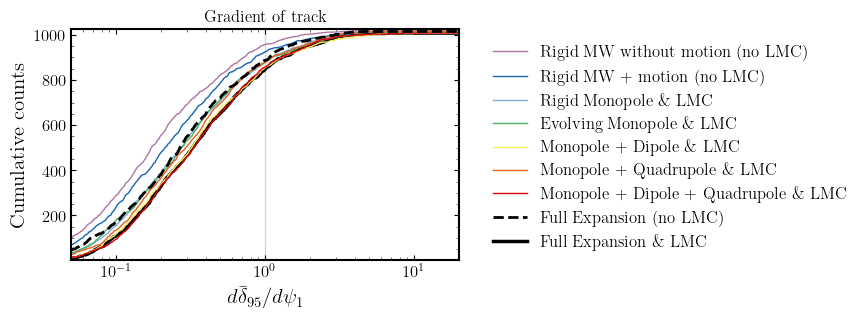

In [4]:
path = '/mnt/ceph/users/rbrooks/oceanus/analysis/stream-runs/combined-files/plotting_data/1024-dthalfMyr-10rpmin-75ramax/'
plotname= '1d-hists-cumulative' 

fig, ax = plt.subplots(1,1, figsize=(5,3))


potentials = list(['rigid-mw.hdf5','static-mw.hdf5', 'rm-MWhalo-full-MWdisc-full-LMC.hdf5', 'em-MWhalo-full-MWdisc-full-LMC.hdf5',\
                       'md-MWhalo-full-MWdisc-full-LMC.hdf5', 'mq-MWhalo-full-MWdisc-full-LMC.hdf5', 'mdq-MWhalo-full-MWdisc-full-LMC.hdf5',\
                        'full-MWhalo-full-MWdisc-no-LMC.hdf5', 'Full-MWhalo-MWdisc-LMC.hdf5'])

# potentials = list(['rigid-mw.hdf5'])

labels = list(['Rigid MW without motion (no LMC)', 'Rigid MW + motion (no LMC)', 'Rigid Monopole \& LMC', 'Evolving Monopole \& LMC', \
               'Monopole + Dipole \& LMC', 'Monopole + Quadrupole \& LMC', 'Monopole + Dipole + Quadrupole \& LMC',\
               'Full Expansion (no LMC)', 'Full Expansion \& LMC'])
# labels = list(['Rigid MW without motion (no LMC)'])

for j in range(len(potentials)): 

    with h5py.File(path + potentials[j],'r') as file:
        pm_ang = np.array(file['pm_misalignment'])
        grad_dev = np.array(file['grad_track_deform'])
        
    #     t_idx = -1
    #     l_pole = np.array(file['pole_l'])[:,t_idx]
    #     b_pole = np.array(file['pole_b'])[:,t_idx]
        
    #     poles =  np.stack((l_pole, b_pole))
    # rot_pole = np.array([rotation_matrix_disc @ poles[:,i] for i in range(len(l_pole))])
    
    # rot_bpole_i = np.where(rot_pole[:,1] > 90, rot_pole[:,1] - 180, rot_pole[:,1])
    # rot_bpole_wrapped = np.where(rot_bpole_i < -90, rot_bpole_i + 180, rot_bpole_i)
    
    # print(np.nanmin(rot_pole[:,0]), np.nanmax(rot_pole[:,0]) )
    # print(np.nanmin(rot_pole[:,1]), np.nanmax(rot_pole[:,1]) )
    # print(np.nanmin(rot_bpole_wrapped), np.nanmax(rot_bpole_wrapped), rot_bpole_wrapped.shape)
    
    # cos_bpole = np.cos(rot_bpole_wrapped * np.pi/180)
    # cos_bpole_prog = cos_bpole[:,0]
    
    # l_pole_std, b_pole_std = np.nanstd(rot_pole[:,0],axis=1) * cos_bpole_prog, np.nanstd(rot_pole[:,1],axis=1)
    
    # pole spread
    # h, bin_edges = np.histogram(l_pole_std, np.logspace(-2, 2, 100))
    # bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
    # if j==8:
    #     plt.plot(bin_mids, np.cumsum(h), lw=2.5, color='k', label=labels[j], zorder=1)
    # elif j==7:
    #     plt.plot(bin_mids, np.cumsum(h), lw=2, ls='dashed', color='k', label=labels[j])
    # else:
    #     plt.plot(bin_mids, np.cumsum(h), lw=1, label=labels[j], zorder=2)
    
    # # pm angle
    # h, bin_edges = np.histogram(pm_ang, bins=np.linspace(0, 90, 500))
    # bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
    # if j==8:
    #     plt.plot(bin_mids, np.cumsum(h), lw=2.5, color='k', label=labels[j], zorder=1)
    # elif j==7:
    #     plt.plot(bin_mids, np.cumsum(h), lw=2, ls='dashed', color='k', label=labels[j])
    # else:
    #     plt.plot(bin_mids, np.cumsum(h), lw=1, label=labels[j], zorder=2)


    # grad deviation
    h, bin_edges = np.histogram(grad_dev, bins=np.logspace(-2, 1.5, 500))
    bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
    if j==8:
        plt.plot(bin_mids, np.cumsum(h), lw=2.5, color='k', label=labels[j], zorder=1)
    elif j==7:
        plt.plot(bin_mids, np.cumsum(h), lw=2, ls='dashed', color='k', label=labels[j])
    else:
        plt.plot(bin_mids, np.cumsum(h), lw=1, label=labels[j], zorder=2)
        
    plt.vlines(1, 0, 1024, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        
    # plt.xlabel(r'$\sigma_{l^{\prime}\,{\mathrm{pole}}} \cos(b^{\prime}_{\mathrm{pole}})\,[^{\circ}]$')
    # plt.xlabel(r'$\bar{\vartheta} \,[^{\circ}]$', fontsize=15)
    plt.xlabel(r'$d \bar{\delta}_{95} / d \psi_1$', fontsize=15)

    plt.ylabel('Cumulative counts', fontsize=15)
    # plt.xlim(0.8,90)
    plt.xlim(0.05,20)
    plt.xscale('log')
    plt.ylim(1,1024)
    # plt.yscale('log')
    plt.title('Gradient of track')
    plt.legend(frameon=False, ncol=1, fontsize=12, bbox_to_anchor=(1.05,1.))
    
# plt.savefig('figures/grad_deviation_metric_dist', bbox_inches='tight')

In [54]:
def plt_1dhists_cumulative(path, plotname, savefig=False):
    fig, ax = plt.subplots(3,3, figsize=(12.5,8.75))
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

    potentials = list(['rigid-mw.hdf5','static-mw.hdf5', 'rm-MWhalo-full-MWdisc-full-LMC.hdf5', 'em-MWhalo-full-MWdisc-full-LMC.hdf5',\
                           'md-MWhalo-full-MWdisc-full-LMC.hdf5', 'mq-MWhalo-full-MWdisc-full-LMC.hdf5', 'mdq-MWhalo-full-MWdisc-full-LMC.hdf5',\
                            'full-MWhalo-full-MWdisc-no-LMC.hdf5', 'Full-MWhalo-MWdisc-LMC.hdf5'])

    labels = list(['Rigid MW without motion (no LMC)', 'Rigid MW + motion (no LMC)', 'Rigid Monopole \& LMC', 'Evolving Monopole \& LMC', \
                   'Monopole + Dipole \& LMC', 'Monopole + Quadrupole \& LMC',\
                   'Monopole + Dipole + Quadrupole \& LMC', 'Full Expansion (no LMC)', 'Full Expansion \& LMC'])

    for j in range(len(potentials)): 

        with h5py.File(path + potentials[j],'r') as file:
            lengths = np.array(file['lengths'])
            widths = np.array(file['widths'])
            loc_veldis = np.array(file['loc_veldis'])
            track_deform = np.array(file['track_deform'])
            pm_ang = np.array(file['pm_misalignment'])
            
            lons = np.array(file['lons'])
            l_lead = np.nanpercentile(lons, 95, axis=1)
            l_trail = np.nanpercentile(lons, 5, axis=1)
            asymmetry = np.abs(l_lead/l_trail)
            
        #     t_idx = -1
        #     l_pole = np.array(file['pole_l'])[:,t_idx]
        #     b_pole = np.array(file['pole_b'])[:,t_idx]
        
        #     poles =  np.stack((l_pole, b_pole))
        # rot_pole = np.array([rotation_matrix_disc @ poles[:,i] for i in range(len(l_pole))])
        
        # rot_bpole_i = np.where(rot_pole[:,1] > 90, rot_pole[:,1] - 180, rot_pole[:,1])
        # rot_bpole_wrapped = np.where(rot_bpole_i < -90, rot_bpole_i + 180, rot_bpole_i)
        # cos_bpole = np.cos(rot_bpole_wrapped * np.pi/180)
        # cos_bpole_prog = cos_bpole[:,0]
        
        # l_pole_std, b_pole_std = np.nanstd(rot_pole[:,0],axis=1) * cos_bpole_prog, np.nanstd(rot_pole[:,1],axis=1)
        # l_pole_std, b_pole_std = np.nanstd(rot_pole[:,0],axis=1), np.nanstd(rot_pole[:,1],axis=1)

        Nstreams= len(lengths)
        # lengths
        plt.sca(ax[0,0])
        h, bin_edges = np.histogram(lengths, bins=np.logspace(-1, np.log10(360), 200))
        bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
        if j==8:
            plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=2.5, color='k', label=labels[j], zorder=1)
        elif j==7:
            plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=2, ls='dashed', color='k', label=labels[j])
        else:
            plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=1, label=labels[j], zorder=2)
        plt.xlabel(r'$l_{\mathrm{stream}}\,[^{\circ}]$')
        plt.ylabel('CDF')
        plt.xlim(1.1, 360)
        plt.ylim(0,1)
        plt.xscale('log')
        plt.title('Length')

        # asymmetry
        plt.sca(ax[0,1])
        h, bin_edges = np.histogram(asymmetry, bins=np.logspace(-1, 1, 300))
        bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
        if j==8:
            plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=2.5, color='k', label=labels[j], zorder=1)
        elif j==7:
            plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=2, ls='dashed', color='k', label=labels[j])
        else:
            plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=1, label=labels[j], zorder=2)
        plt.xlabel(r'$l_{\mathrm{leading}}/l_{\mathrm{trailing}}$')
        plt.ylabel('CDF')
        plt.xlim(0.09, 11)
        plt.xscale('log')
        plt.ylim(0,1)
        plt.title('Asymmetry')

        #widths
        plt.sca(ax[0,2])
        h, bin_edges = np.histogram(widths, bins=np.logspace(np.log10(0.05), np.log10(3), 100))
        bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
        if j==8:
            plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=2.5, color='k', label=labels[j], zorder=1)
        elif j==7:
            plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=2, ls='dashed', color='k', label=labels[j])
        else:
            plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=1, label=labels[j], zorder=2)
        plt.vlines(0.5, 0, 1, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        
        plt.xlabel(r'$w\,[^{\circ}]$')
        plt.ylabel('CDF')
        plt.xlim(5e-2,3)
        plt.ylim(0,1)
        plt.xscale('log')
        plt.title('Width')

        # track deformation
        plt.sca(ax[1,0])
        h, bin_edges = np.histogram(track_deform, bins=np.logspace(-2, 1, 100))
        bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
        if j==8:
            plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=2.5, color='k', label=labels[j], zorder=1)
        elif j==7:
            plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=2, ls='dashed', color='k', label=labels[j])
        else:
            plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=1, label=labels[j], zorder=2)
        plt.vlines(2, 0, 1, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        
        plt.xlabel(r'$\bar{\delta}\,[^{\circ}]$')
        plt.ylabel('CDF')
        plt.xlim(5e-2,10)
        plt.ylim(0,1)
        plt.xscale('log')
        plt.title('Deviation from Great Circle')

        # velocity dispersion
        plt.sca(ax[1,1])
        h, bin_edges = np.histogram(loc_veldis, bins=np.logspace(-1, np.log10(20), 100))
        bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
        if j==8:
            plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=2.5, color='k', label=labels[j], zorder=1)
        elif j==7:
            plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=2, ls='dashed', color='k', label=labels[j])
        else:
            plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=1, label=labels[j], zorder=2)
        plt.vlines(2.5, 0, 1, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        
        plt.xlabel(r'$\sigma_{v}\,[\mathrm{km}\,\mathrm{s}^{-1}]$')
        plt.ylabel('CDF')
        plt.xlim(2e-1,20)
        plt.ylim(0,1)
        plt.xscale('log')
        plt.title('Local velocity dispersion')
    
        # pm angle
        plt.sca(ax[1,2])
        h, bin_edges = np.histogram(pm_ang, bins=np.logspace(np.log10(0.5), np.log10(90), 500))
        bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
        if j==8:
            plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=2.5, color='k', label=labels[j], zorder=1)
        elif j==7:
            plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=2, ls='dashed', color='k', label=labels[j])
        else:
            plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=1, label=labels[j], zorder=2)

        plt.vlines(10, 0, 1, color='lightgrey', ls='solid', lw=.75, zorder=0.5)

        plt.xlabel(r'$\bar{\vartheta} \,[^{\circ}]$')
        plt.ylabel('CDF')
        plt.xlim(0.8,90)
        plt.xscale('log')
        plt.ylim(0,1)
        plt.title('Proper motion misalignment')
        
        # median l pole spread
        plt.sca(ax[2,0])
        # h, bin_edges = np.histogram(l_pole_std, bins=np.logspace(-2, 2, 100))
        # bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
        # if j==8:
        #     plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=2.5, color='k', label=labels[j], zorder=1)
        # elif j==7:
        #     plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=2, ls='dashed', color='k', label=labels[j])
        # else:
        #     plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=1, label=labels[j], zorder=2)
        # plt.vlines(2, 0, 1, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        
        plt.xlabel(r'$\sigma_{l^{\prime}\,{\mathrm{pole}}} \cos(b^{\prime}_{\mathrm{pole}})\,[^{\circ}]$')
        plt.ylabel('CDF')
        plt.xlim(0.05,150)
        plt.ylim(0,1)
        plt.xscale('log')
        plt.title('Longitudinal pole dispersion')
        
        # median b pole spread
        plt.sca(ax[2,1])
        # h, bin_edges = np.histogram(b_pole_std, bins=np.logspace(-2, 2, 100))
        # bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
        # if j==8:
        #     plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=2.5, color='k', label=labels[j], zorder=1)
        # elif j==7:
        #     plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=2, ls='dashed', color='k', label=labels[j])
        # else:
        #     plt.plot(bin_mids, np.cumsum(h)/Nstreams, lw=1, label=labels[j], zorder=2)
        # plt.vlines(2, 0, 1, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        
        plt.xlabel(r'$\sigma_{b^{\prime},\,{\mathrm{pole}}}[^{\circ}]$')
        plt.ylabel('CDF')
        plt.xlim(0.05,150)
        plt.ylim(0,1)
        plt.xscale('log')
        plt.title('Latitudinal pole dispersion')
        plt.legend(frameon=False, ncol=1, fontsize=12, bbox_to_anchor=(1.1,1.15))
        
        ax[2,2].set_visible(False)
        
    if savefig==False:
        return
    elif savefig==True:
        savepath = '/mnt/ceph/users/rbrooks/oceanus/analysis/figures/paper-figs/{}'.format(plotname)
        print('* Saving figure at {}.pdf'.format(savepath))
        plt.savefig(savepath, bbox_inches='tight')
    # plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

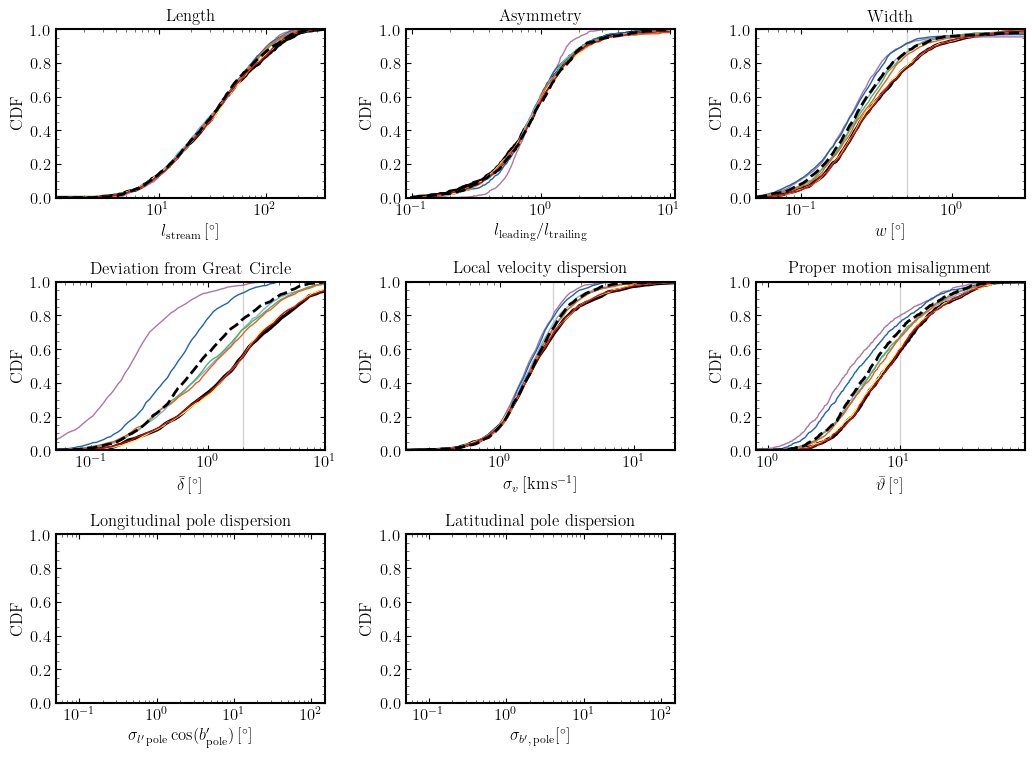

In [55]:
path = '/mnt/ceph/users/rbrooks/oceanus/analysis/stream-runs/combined-files/plotting_data/1024-dthalfMyr-10rpmin-75ramax/'
plotname= 'fig3' 

plt_1dhists_cumulative(path, plotname, False)

Plotting as a PDF

In [14]:
def PDFs(path, plotname, savefig=False):
    fig, ax = plt.subplots(3,3, figsize=(12.5,8.75))
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

    potentials = list(['rigid-mw.hdf5','static-mw.hdf5', 'rm-MWhalo-full-MWdisc-full-LMC.hdf5', 'em-MWhalo-full-MWdisc-full-LMC.hdf5',\
                           'md-MWhalo-full-MWdisc-full-LMC.hdf5', 'mq-MWhalo-full-MWdisc-full-LMC.hdf5', 'mdq-MWhalo-full-MWdisc-full-LMC.hdf5',\
                            'full-MWhalo-full-MWdisc-no-LMC.hdf5', 'Full-MWhalo-MWdisc-LMC.hdf5'])

    labels = list(['Rigid MW without motion (no LMC)', 'Rigid MW + motion (no LMC)', 'Rigid Monopole \& LMC', 'Evolving Monopole \& LMC', \
                   'Monopole + Dipole \& LMC', 'Monopole + Quadrupole \& LMC',\
                   'Monopole + Dipole + Quadrupole \& LMC', 'Full Expansion (no LMC)', 'Full Expansion \& LMC'])

    for j in range(len(potentials)): 

        with h5py.File(path + potentials[j],'r') as file:
            # lengths = np.array(file['lengths'])
            # widths = np.array(file['widths'])
            loc_veldis = np.array(file['loc_veldis'])
            # track_deform = np.array(file['track_deform'])
            # pm_ang = np.array(file['pm_misalignment'])
            
            # lons = np.array(file['lons'])
            # l_lead = np.nanpercentile(lons, 95, axis=1)
            # l_trail = np.nanpercentile(lons, 5, axis=1)
            # asymmetry = np.abs(l_lead/l_trail)
            
        #     t_idx = -1
        #     l_pole = np.array(file['pole_l'])[:,t_idx]
        #     b_pole = np.array(file['pole_b'])[:,t_idx]
        
        #     poles =  np.stack((l_pole, b_pole))
        # rot_pole = np.array([rotation_matrix_disc @ poles[:,i] for i in range(len(l_pole))])
        
        # rot_bpole_i = np.where(rot_pole[:,1] > 90, rot_pole[:,1] - 180, rot_pole[:,1])
        # rot_bpole_wrapped = np.where(rot_bpole_i < -90, rot_bpole_i + 180, rot_bpole_i)
        # cos_bpole = np.cos(rot_bpole_wrapped * np.pi/180)
        # cos_bpole_prog = cos_bpole[:,0]
        
        # l_pole_std, b_pole_std = np.nanstd(rot_pole[:,0],axis=1) * cos_bpole_prog, np.nanstd(rot_pole[:,1],axis=1)

        # lengths
        # plt.sca(ax[0,0])
        # if j==8:
        #     kde=sns.kdeplot(data=lengths, bw_adjust=1, log_scale=True, lw=2.5, color='k', label=labels[j], zorder=1 )
 
        # elif j==7:
        #     kde=sns.kdeplot(data=lengths, bw_adjust=1, log_scale=True, lw=2, ls='dashed', color='k', label=labels[j])
 
        # else:
        #     kde=sns.kdeplot(data=lengths, bw_adjust=1, log_scale=True,  lw=1, label=labels[j], zorder=2)
   
        plt.xlabel(r'$l_{\mathrm{stream}}\,[^{\circ}]$')
        plt.ylabel('PDF')
        plt.xlim(1.1, 360)
        plt.ylim(0,.99)
        plt.xscale('log')
        plt.title('Length')

        # asymmetry
        plt.sca(ax[0,1])
        # if j==8:
        #     kde=sns.kdeplot(data=asymmetry, bw_adjust=1, log_scale=True,lw=2.5, color='k', label=labels[j], zorder=1 )
 
        # elif j==7:
        #     kde=sns.kdeplot(data=asymmetry, bw_adjust=1, log_scale=True,lw=2, ls='dashed', color='k', label=labels[j])
 
        # else:
        #     kde=sns.kdeplot(data=asymmetry, bw_adjust=1, log_scale=True,lw=1, label=labels[j], zorder=2)
 
        plt.xlabel(r'$l_{\mathrm{leading}}/l_{\mathrm{trailing}}$')
        plt.ylabel('PDF')
        plt.xlim(0.09, 11)
        plt.xscale('log')
        plt.ylim(0, 2.49)
        plt.title('Asymmetry')

        #widths
        plt.sca(ax[0,2])
        # if j==8:
        #     kde=sns.kdeplot(data=widths, bw_adjust=1,log_scale=True,lw=2.5, color='k', label=labels[j], zorder=1 )
 
        # elif j==7:
        #     kde=sns.kdeplot(data=widths, bw_adjust=1, log_scale=True,lw=2, ls='dashed', color='k', label=labels[j])
 
        # else:
        #     kde=sns.kdeplot(data=widths, bw_adjust=1, log_scale=True,lw=1, label=labels[j], zorder=2)
 
        plt.vlines(0.5, 0, 4, color='lightgrey', ls='solid', lw=.75, zorder=0.5, clip_on=True)
        
        plt.xlabel(r'$w\,[^{\circ}]$')
        plt.ylabel('PDF')
        plt.xlim(5e-2,3)
        plt.ylim(0, 2.49)
        plt.xscale('log')
        plt.title('Width')

        # track deformation
        plt.sca(ax[1,0])
        # if j==8:
        #     kde=sns.kdeplot(data=track_deform, bw_adjust=1, log_scale=True,lw=2.5, color='k', label=labels[j], zorder=1 )
 
        # elif j==7:
        #     kde=sns.kdeplot(data=track_deform, bw_adjust=1, log_scale=True,lw=2, ls='dashed', color='k', label=labels[j])
 
        # else:
        #     kde=sns.kdeplot(data=track_deform, bw_adjust=1, log_scale=True,lw=1, label=labels[j], zorder=2)
 
        plt.vlines(2, 0, 4, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        
        plt.xlabel(r'$\bar{\delta}\,[^{\circ}]$')
        plt.ylabel('PDF')
        plt.xlim(5e-2,10)
        plt.ylim(0,1.49)
        plt.xscale('log')
        plt.title('Deviation from Great Circle')

        # velocity dispersion
        plt.sca(ax[1,1])

        print(loc_veldis.shape, np.min(loc_veldis), np.max(loc_veldis))
        loc_veldis[loc_veldis == 0] = 0.0001
        print(loc_veldis.shape, np.min(loc_veldis), np.max(loc_veldis))
        
        if j==8:
            kde=sns.kdeplot(data=loc_veldis, bw_adjust=1, log_scale=True,lw=2.5, color='k', label=labels[j], zorder=1 )
 
        elif j==7:
            kde=sns.kdeplot(data=loc_veldis, bw_adjust=1, log_scale=True,lw=2, ls='dashed', color='k', label=labels[j])
 
        else:
            kde=sns.kdeplot(data=loc_veldis, bw_adjust=1, log_scale=True,lw=1, label=labels[j], zorder=2)
 
        plt.vlines(2.5, 0, 4, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        
        plt.xlabel(r'$\sigma_{v}\,[\mathrm{km}\,\mathrm{s}^{-1}]$')
        plt.ylabel('PDF')
        plt.xlim(2e-1,20)
        plt.ylim(0,2.49)
        plt.xscale('log')
        plt.title('Local velocity dispersion')
    
        # pm angle
        plt.sca(ax[1,2])
        # if j==8:
        #     kde=sns.kdeplot(data=pm_ang, bw_adjust=1, log_scale=True,lw=2.5, color='k', label=labels[j], zorder=1 )
 
        # elif j==7:
        #     kde=sns.kdeplot(data=pm_ang, bw_adjust=1, log_scale=True,lw=2, ls='dashed', color='k', label=labels[j])
 
        # else:
        #     kde=sns.kdeplot(data=pm_ang, bw_adjust=1, log_scale=True,lw=1, label=labels[j], zorder=2)
 
        plt.vlines(10, 0, 4, color='lightgrey', ls='solid', lw=.75, zorder=0.5)

        plt.xlabel(r'$\bar{\vartheta} \,[^{\circ}]$')
        plt.ylabel('PDF')
        plt.xlim(0.8,90)
        plt.xscale('log')
        plt.ylim(0,1.49)
        plt.title('Proper motion misalignment')
        
        # median l pole spread
        plt.sca(ax[2,0])
        # if j==8:
        #     kde=sns.kdeplot(data=l_pole_std, bw_adjust=1,log_scale=True,lw=2.5, color='k', label=labels[j], zorder=1 )

        # elif j==7:
        #     kde=sns.kdeplot(data=l_pole_std, bw_adjust=1,log_scale=True, lw=2, ls='dashed', color='k', label=labels[j])

        # else:
        #     kde=sns.kdeplot(data=l_pole_std, bw_adjust=1,log_scale=True, lw=1, label=labels[j], zorder=2)
        plt.vlines(2, 0, 4, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        
        plt.xlabel(r'$\sigma_{l^{\prime}\,{\mathrm{pole}}} \cos(b^{\prime}_{\mathrm{pole}})\,[^{\circ}]$')
        plt.ylabel('PDF')
        plt.xlim(0.05,150)
        plt.ylim(0, 1.99)
        plt.xscale('log')
        plt.title('Longitudinal pole dispersion')
        
        # median b pole spread
        plt.sca(ax[2,1])
        # if j==8:
        #     kde=sns.kdeplot(data=b_pole_std, bw_adjust=1,log_scale=True, lw=2.5, color='k', label=labels[j], zorder=1 )

        # elif j==7:
        #     kde=sns.kdeplot(data=b_pole_std, bw_adjust=1,log_scale=True,lw=2, ls='dashed', color='k', label=labels[j])

        # else:
        #     kde=sns.kdeplot(data=b_pole_std, bw_adjust=1, log_scale=True,lw=1, label=labels[j], zorder=2)
        plt.vlines(2, 0, 4, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        
        plt.xlabel(r'$\sigma_{b^{\prime},\,{\mathrm{pole}}}[^{\circ}]$')
        plt.ylabel('PDF')
        plt.xlim(0.05,150)
        plt.ylim(0,2.49)
        plt.xscale('log')
        plt.title('Latitudinal pole dispersion')
        plt.legend(frameon=False, ncol=1, fontsize=12, bbox_to_anchor=(1.1,1.15))
        
        ax[2,2].set_visible(False)
        
    if savefig==False:
        return
    elif savefig==True:
        savepath = '/mnt/ceph/users/rbrooks/oceanus/analysis/figures/paper-figs/{}'.format(plotname)
        print('* Saving figure at {}.pdf'.format(savepath))
        plt.savefig(savepath, bbox_inches='tight')
    plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(16384,) 0.1437167413990892 15.312343301827703
(16384,) 0.1437167413990892 15.312343301827703
(16384,) 0.0 14.34907926534489
(16384,) 0.0001 14.34907926534489


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(16384,) 0.0 113.96842982190091
(16384,) 0.0001 113.96842982190091


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(16384,) 0.0 94.22601814017948
(16384,) 0.0001 94.22601814017948
(16384,) 0.0 80.06934384311454
(16384,) 0.0001 80.06934384311454


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(16384,) 0.0 111.5457354070928
(16384,) 0.0001 111.5457354070928


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(16384,) 0.0 89.29473414901531
(16384,) 0.0001 89.29473414901531


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(16384,) 0.0 27.238211580688994
(16384,) 0.0001 27.238211580688994


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/mnt/ceph/users/rbrooks/oceanus/analysis/stream-runs/combined-files/plotting_data/16384-dt1Myr/Full-MWhalo-MWdisc-LMC.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

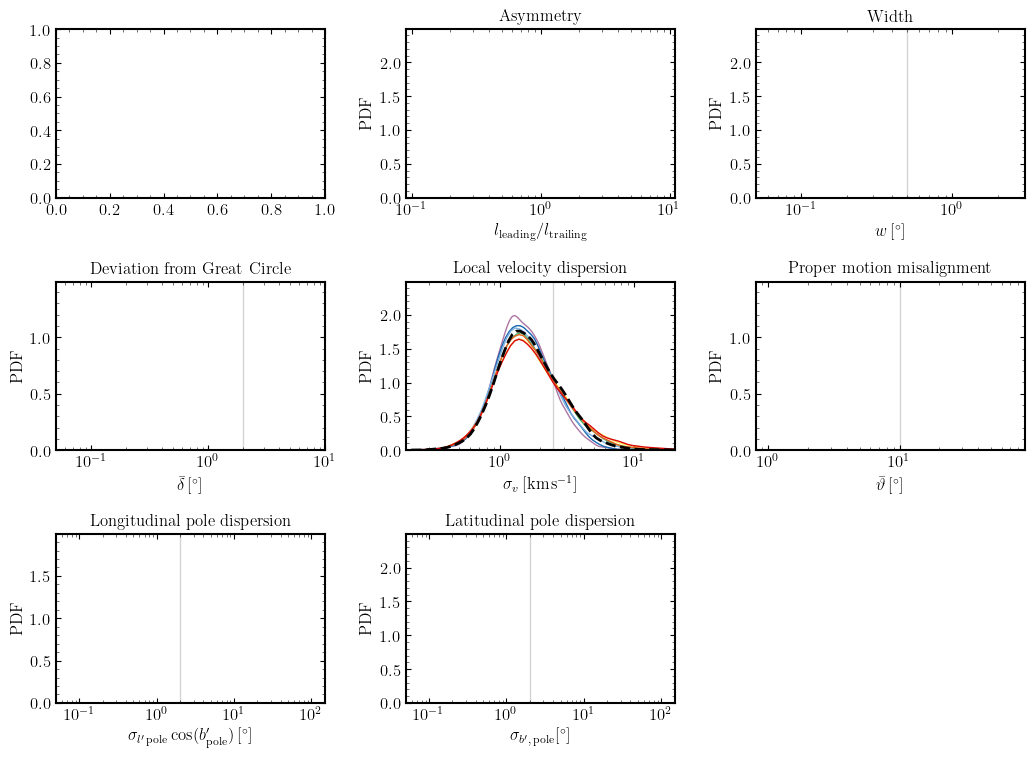

In [15]:
path = '/mnt/ceph/users/rbrooks/oceanus/analysis/stream-runs/combined-files/plotting_data/16384-dt1Myr/' # 1024-dthalfMyr-10rpmin-75ramax
plotname= 'fig3-pdf-smallersample' 

PDFs(path, plotname, False)

Plotting the PDFs normalised by the rigid MW potential

In [16]:
def PDF_ratios(path, plotname, savefig=False):
    fig, ax = plt.subplots(3,3, figsize=(12.5,8.75))
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

    potentials = list(['rigid-mw.hdf5','static-mw.hdf5', 'rm-MWhalo-full-MWdisc-full-LMC.hdf5', 'em-MWhalo-full-MWdisc-full-LMC.hdf5',\
                           'md-MWhalo-full-MWdisc-full-LMC.hdf5', 'mq-MWhalo-full-MWdisc-full-LMC.hdf5', 'mdq-MWhalo-full-MWdisc-full-LMC.hdf5',\
                            'full-MWhalo-full-MWdisc-no-LMC.hdf5', 'Full-MWhalo-MWdisc-LMC.hdf5'])

    labels = list(['Rigid MW without motion (no LMC)', 'Rigid MW + motion (no LMC)', 'Rigid Monopole \& LMC', 'Evolving Monopole \& LMC', \
                   'Monopole + Dipole \& LMC', 'Monopole + Quadrupole \& LMC',\
                   'Monopole + Dipole + Quadrupole \& LMC', 'Full Expansion (no LMC)', 'Full Expansion \& LMC'])

    
    with h5py.File(path + potentials[0],'r') as file:
        lengths0 = np.array(file['lengths'])
        widths0 = np.array(file['widths'])
        loc_veldis0 = np.array(file['loc_veldis'])
        track_deform0 = np.array(file['track_deform'])
        pm_ang0 = np.array(file['pm_misalignment'])
        
        lons0 = np.array(file['lons'])
        l_lead0 = np.nanpercentile(lons0, 95, axis=1)
        l_trail0 = np.nanpercentile(lons0, 5, axis=1)
        asymmetry0 = np.abs(l_lead0/l_trail0)
        
        t_idx = -1
        l_pole0 = np.array(file['pole_l'])[:,t_idx]
        b_pole0 = np.array(file['pole_b'])[:,t_idx]
    
        poles0 =  np.stack((l_pole0, b_pole0))
    rot_pole0 = np.array([rotation_matrix_disc @ poles0[:,i] for i in range(len(l_pole0))])
    
    rot_bpole_i0 = np.where(rot_pole0[:,1] > 90, rot_pole0[:,1] - 180, rot_pole0[:,1])
    rot_bpole_wrapped0 = np.where(rot_bpole_i0 < -90, rot_bpole_i0 + 180, rot_bpole_i0)
    cos_bpole0 = np.cos(rot_bpole_wrapped0 * np.pi/180)
    cos_bpole_prog0 = cos_bpole0[:,0]
    l_pole_std0, b_pole_std0 = np.nanstd(rot_pole0[:,0],axis=1) * cos_bpole_prog0, np.nanstd(rot_pole0[:,1],axis=1)

    for j in range(1, len(potentials) ): 

        with h5py.File(path + potentials[j],'r') as file:
            lengths = np.array(file['lengths'])
            widths = np.array(file['widths'])
            loc_veldis = np.array(file['loc_veldis'])
            track_deform = np.array(file['track_deform'])
            pm_ang = np.array(file['pm_misalignment'])
            
            lons = np.array(file['lons'])
            l_lead = np.nanpercentile(lons, 95, axis=1)
            l_trail = np.nanpercentile(lons, 5, axis=1)
            asymmetry = np.abs(l_lead/l_trail)
            
            t_idx = -1
            l_pole = np.array(file['pole_l'])[:,t_idx]
            b_pole = np.array(file['pole_b'])[:,t_idx]
        
            poles =  np.stack((l_pole, b_pole))
        rot_pole = np.array([rotation_matrix_disc @ poles[:,i] for i in range(len(l_pole))])
        
        rot_bpole_i = np.where(rot_pole[:,1] > 90, rot_pole[:,1] - 180, rot_pole[:,1])
        rot_bpole_wrapped = np.where(rot_bpole_i < -90, rot_bpole_i + 180, rot_bpole_i)
        cos_bpole = np.cos(rot_bpole_wrapped * np.pi/180)
        cos_bpole_prog = cos_bpole[:,0]
        
        l_pole_std, b_pole_std = np.nanstd(rot_pole[:,0],axis=1) * cos_bpole_prog, np.nanstd(rot_pole[:,1],axis=1)
        l_pole_std, b_pole_std = np.nanstd(rot_pole[:,0],axis=1), np.nanstd(rot_pole[:,1],axis=1)

        # lengths
        plt.sca(ax[0,0])
        if j==8:
            kde=sns.kdeplot(data=lengths/lengths0, bw_adjust=1, log_scale=True, lw=2.5, color='k', label=labels[j], zorder=1 )
 
        elif j==7:
            kde=sns.kdeplot(data=lengths/lengths0, bw_adjust=1, log_scale=True, lw=2, ls='dashed', color='k', label=labels[j])
 
        else:
            kde=sns.kdeplot(data=lengths/lengths0, bw_adjust=1, log_scale=True,  lw=1, label=labels[j], zorder=2)
   
        plt.xlabel(r'$l / l_0$')
        plt.ylabel('PDF')
        plt.xlim(0.011, 99.9)
        plt.ylim(0,)
        plt.xscale('log')
        plt.title('Length')

        # asymmetry
        plt.sca(ax[0,1])
        if j==8:
            kde=sns.kdeplot(data=asymmetry/asymmetry0, bw_adjust=1, log_scale=True,lw=2.5, color='k', label=labels[j], zorder=1 )
 
        elif j==7:
            kde=sns.kdeplot(data=asymmetry/asymmetry0, bw_adjust=1, log_scale=True,lw=2, ls='dashed', color='k', label=labels[j])
 
        else:
            kde=sns.kdeplot(data=asymmetry/asymmetry0, bw_adjust=1, log_scale=True,lw=1, label=labels[j], zorder=2)
 
        plt.xlabel(r'$A / A_0$')
        plt.ylabel('PDF')
        plt.xlim(0.011, 99.9)
        plt.xscale('log')
        plt.ylim(0,)
        plt.title('Asymmetry')

        #widths
        plt.sca(ax[0,2])
        if j==8:
            kde=sns.kdeplot(data=widths/widths0, bw_adjust=1,log_scale=True,lw=2.5, color='k', label=labels[j], zorder=1 )
 
        elif j==7:
            kde=sns.kdeplot(data=widths/widths0, bw_adjust=1, log_scale=True,lw=2, ls='dashed', color='k', label=labels[j])
 
        else:
            kde=sns.kdeplot(data=widths/widths0, bw_adjust=1, log_scale=True,lw=1, label=labels[j], zorder=2)
 
        # plt.vlines(0.5, 0, 2, color='lightgrey', ls='solid', lw=.75, zorder=0.5, clip_on=True)
        
        plt.xlabel(r'$w / w _0$')
        plt.ylabel('PDF')
        plt.xlim(0.011, 99.9)
        plt.ylim(0, None)
        plt.xscale('log')
        plt.title('Width')

        # track deformation
        plt.sca(ax[1,0])
        if j==8:
            kde=sns.kdeplot(data=track_deform/track_deform0, bw_adjust=1, log_scale=True,lw=2.5, color='k', label=labels[j], zorder=1 )
 
        elif j==7:
            kde=sns.kdeplot(data=track_deform/track_deform0, bw_adjust=1, log_scale=True,lw=2, ls='dashed', color='k', label=labels[j])
 
        else:
            kde=sns.kdeplot(data=track_deform/track_deform0, bw_adjust=1, log_scale=True,lw=1, label=labels[j], zorder=2)
 
        # plt.vlines(2, 0, 2, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        
        plt.xlabel(r'$\bar{\delta} / \bar{\delta}_0$')
        plt.ylabel('PDF')
        plt.xlim(0.011, 99.9)
        plt.ylim(0,)
        plt.xscale('log')
        plt.title('Deviation from Great Circle')

        # velocity dispersion
        plt.sca(ax[1,1])
        if j==8:
            kde=sns.kdeplot(data=loc_veldis/loc_veldis0, bw_adjust=1, log_scale=True,lw=2.5, color='k', label=labels[j], zorder=1 )
 
        elif j==7:
            kde=sns.kdeplot(data=loc_veldis/loc_veldis0, bw_adjust=1, log_scale=True,lw=2, ls='dashed', color='k', label=labels[j])
 
        else:
            kde=sns.kdeplot(data=loc_veldis/loc_veldis0, bw_adjust=1, log_scale=True,lw=1, label=labels[j], zorder=2)
 
        # plt.vlines(2.5, 0, 2, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        
        plt.xlabel(r'$\sigma_{v} / \sigma_{v,0}$')
        plt.ylabel('PDF')
        plt.xlim(0.011, 99.9)
        plt.ylim(0,)
        plt.xscale('log')
        plt.title('Local velocity dispersion')
    
        # pm angle
        plt.sca(ax[1,2])
        if j==8:
            kde=sns.kdeplot(data=pm_ang/pm_ang0, bw_adjust=1, log_scale=True,lw=2.5, color='k', label=labels[j], zorder=1 )
 
        elif j==7:
            kde=sns.kdeplot(data=pm_ang/pm_ang0, bw_adjust=1, log_scale=True,lw=2, ls='dashed', color='k', label=labels[j])
 
        else:
            kde=sns.kdeplot(data=pm_ang/pm_ang0, bw_adjust=1, log_scale=True,lw=1, label=labels[j], zorder=2)
 
        # plt.vlines(10, 0, 2, color='lightgrey', ls='solid', lw=.75, zorder=0.5)

        plt.xlabel(r'$\bar{\vartheta} / \bar{\vartheta}_0$')
        plt.ylabel('PDF')
        plt.xlim(0.011, 99.9)
        plt.xscale('log')
        plt.ylim(0,)
        plt.title('Proper motion misalignment')
        
        # median l pole spread
        plt.sca(ax[2,0])
        if j==8:
            kde=sns.kdeplot(data=l_pole_std/l_pole_std0, bw_adjust=1,log_scale=True,lw=2.5, color='k', label=labels[j], zorder=1 )

        elif j==7:
            kde=sns.kdeplot(data=l_pole_std/l_pole_std0, bw_adjust=1,log_scale=True, lw=2, ls='dashed', color='k', label=labels[j])

        else:
            kde=sns.kdeplot(data=l_pole_std/l_pole_std0, bw_adjust=1,log_scale=True, lw=1, label=labels[j], zorder=2)
        # plt.vlines(2, 0, 2, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        
        plt.xlabel(r'$\sigma_{l^{\prime}\,{\mathrm{pole}}} \cos(b^{\prime}_{\mathrm{pole}}) / \sigma_{l^{\prime}\,{\mathrm{pole}}, 0} \cos(b^{\prime}_{\mathrm{pole}, 0}) $')
        plt.ylabel('PDF')
        plt.xlim(0.011, 99.9)
        plt.ylim(0,)
        plt.xscale('log')
        plt.title('Longitudinal pole dispersion')
        
        # median b pole spread
        plt.sca(ax[2,1])
        if j==8:
            kde=sns.kdeplot(data=b_pole_std/b_pole_std0, bw_adjust=1,log_scale=True, lw=2.5, color='k', label=labels[j], zorder=1 )

        elif j==7:
            kde=sns.kdeplot(data=b_pole_std/b_pole_std0, bw_adjust=1,log_scale=True,lw=2, ls='dashed', color='k', label=labels[j])

        else:
            kde=sns.kdeplot(data=b_pole_std/b_pole_std0, bw_adjust=1, log_scale=True,lw=1, label=labels[j], zorder=2)
        # plt.vlines(2, 0, 2, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        
        plt.xlabel(r'$\sigma_{b^{\prime},\,{\mathrm{pole}}} / \sigma_{b^{\prime},\,{\mathrm{pole}},0 } $')
        plt.ylabel('PDF')
        plt.xlim(0.011, 99.9)
        plt.ylim(0,)
        plt.xscale('log')
        plt.title('Latitudinal pole dispersion')
        plt.legend(frameon=False, ncol=1, fontsize=12, bbox_to_anchor=(1.1,1.15))
        
        ax[2,2].set_visible(False)
        
    if savefig==False:
        return
    elif savefig==True:
        savepath = '/mnt/ceph/users/rbrooks/oceanus/analysis/figures/histograms/{}'.format(plotname)
        print('* Saving figure at {}.pdf'.format(savepath))
        plt.savefig(savepath, bbox_inches='tight')
    # plt.close()

* Saving figure at /mnt/ceph/users/rbrooks/oceanus/analysis/figures/histograms/fig3-pdfratio-smallersample.pdf


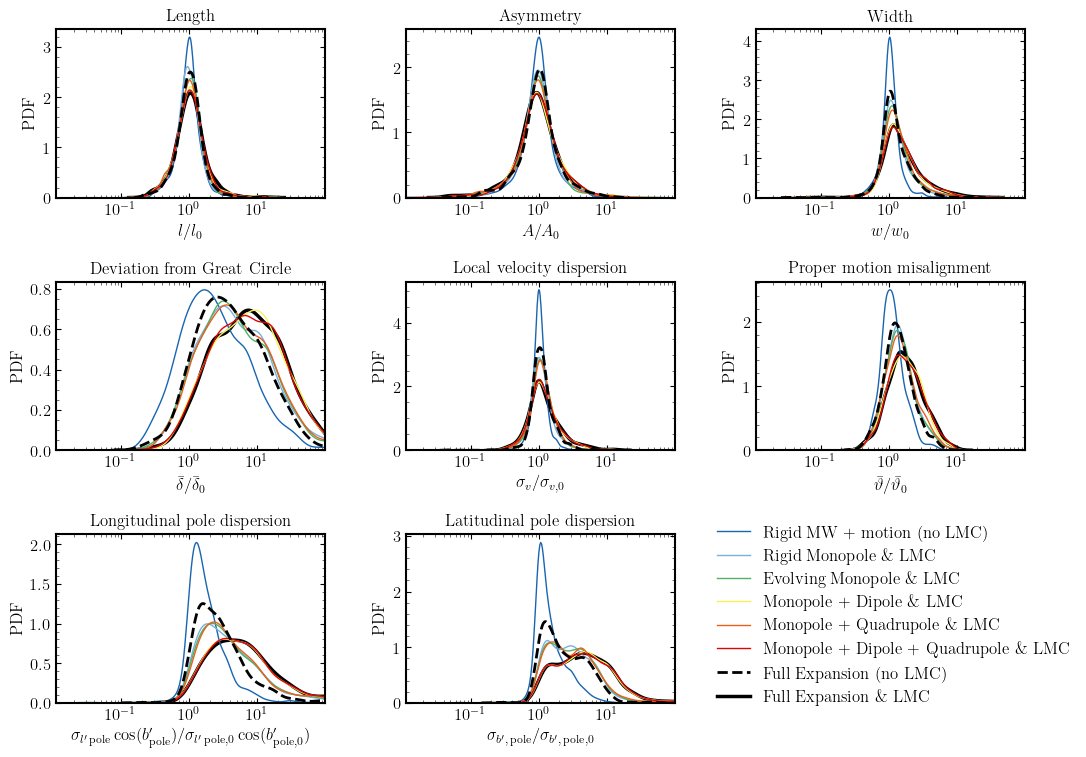

In [17]:
# from cycler import cycler
# current_cycler = plt.rcParams['axes.prop_cycle']
# skipped_cycler = cycler(color=current_cycler.by_key()['color'][1:])
# plt.rc('axes', prop_cycle=skipped_cycler)

path = '/mnt/ceph/users/rbrooks/oceanus/analysis/stream-runs/combined-files/plotting_data/1024-dthalfMyr-10rpmin-75ramax/'
plotname= 'fig3-pdfratio-smallersample' 

PDF_ratios(path, plotname, True)

Is there a preferred direction for orbital poles to spread out in?

In [27]:
def orbpole_spreads(path, plotname, cumsum=True, savefig=False):
    fig, ax = plt.subplots(3,2, figsize=(10,10), sharey=True)
    plt.subplots_adjust(hspace=0.5, wspace=0.1)

    potentials = list(['rigid-mw.hdf5','static-mw.hdf5', 'rm-MWhalo-full-MWdisc-full-LMC.hdf5', 'em-MWhalo-full-MWdisc-full-LMC.hdf5',\
                           'md-MWhalo-full-MWdisc-full-LMC.hdf5', 'mq-MWhalo-full-MWdisc-full-LMC.hdf5', 'mdq-MWhalo-full-MWdisc-full-LMC.hdf5',\
                            'full-MWhalo-full-MWdisc-no-LMC.hdf5', 'Full-MWhalo-MWdisc-LMC.hdf5'])
    # potentials = list(['Full-MWhalo-MWdisc-LMC.hdf5'])

    labels = list(['Rigid MW without motion (no LMC)', 'Rigid MW + motion (no LMC)', 'Rigid Monopole \& LMC', 'Evolving Monopole \& LMC', \
                   'Monopole + Dipole \& LMC', 'Monopole + Quadrupole \& LMC', 'Monopole + Dipole + Quadrupole \& LMC', 'Full Expansion (no LMC)', 'Full Expansion \& LMC'])

    for j in range(len(potentials)): 

        with h5py.File(path + potentials[j],'r') as file:

            t_idx = -1
            l_pole = np.array(file['pole_l'])[:,t_idx]
            b_pole = np.array(file['pole_b'])[:,t_idx]
            poles =  np.stack((l_pole, b_pole))
            poles_lmc =  np.stack((b_pole, l_pole))
            
        rot_pole_lmc = np.array([rotation_matrix_lmc @ poles_lmc[:,i] for i in range(len(l_pole))])
        l_pole_std_lmc, b_pole_std_lmc = np.nanstd(rot_pole_lmc[:,0],axis=1), np.nanstd(rot_pole_lmc[:,1],axis=1)
        
        rot_pole_disc = np.array([rotation_matrix_disc @ poles[:,i] for i in range(len(l_pole))])
        l_pole_std_disc, b_pole_std_disc = np.nanstd(rot_pole_disc[:,0],axis=1), np.nanstd(rot_pole_disc[:,1],axis=1)
                                                                                        
        rot_pole_com = np.array([rotation_matrix_com @ poles[:,i] for i in range(len(l_pole))])
        l_pole_std_com, b_pole_std_com = np.nanstd(rot_pole_com[:,0],axis=1), np.nanstd(rot_pole_com[:,1],axis=1)  
        
        if cumsum==True:
            pole_bins = np.logspace(-2, 2, 100) #np.linspace(0, 180, 1000)
            plt.ylim(0,16394)
            plt.suptitle(r'$\Sigma_{\mathrm{counts}}$')
        else:
            pole_bins = np.logspace(-2, 2, 50)
            plt.ylim(0,250)
            plt.suptitle('Counts')

        #----------------------------------------------------------------------------------------------------------
        ### LMC pole frame
        #----------------------------------------------------------------------------------------------------------
        
        # median l pole spread - LMC frame
        plt.sca(ax[0,0])
        h, bin_edges = np.histogram(l_pole_std_lmc, bins=pole_bins)
        if cumsum==True:
            h = np.cumsum(h)
        plt.vlines(2, 0, 16394, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
        if j==8:
            plt.plot(bin_mids, h, lw=2.5, color='k', label=labels[j], zorder=1)
        elif j==7:
            plt.plot(bin_mids, h, lw=2, ls='dashed', color='k', label=labels[j])
        else:
            plt.plot(bin_mids, h, lw=1, label=labels[j], zorder=2)
        
        
        plt.xlabel(r'$\sigma_{l, \, {\mathrm{pole}}} [^{\circ}]$')
        # plt.ylabel(r'$\Sigma_{\mathrm{counts}}$')
        plt.xlim(0.02,180)
        # plt.ylim(0,16394)
        plt.xscale('log')
        plt.title('Longitudinal pole spread - LMC frame')
        
        # median b pole spread - LMC frame
        plt.sca(ax[0,1])
        h, bin_edges = np.histogram(b_pole_std_lmc, bins=pole_bins)
        if cumsum==True:
            h = np.cumsum(h)
        plt.vlines(2, 0, 16394, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
        if j==8:
            plt.plot(bin_mids, h, lw=2.5, color='k', label=labels[j], zorder=1)
        elif j==7:
            plt.plot(bin_mids, h, lw=2, ls='dashed', color='k', label=labels[j])
        else:
            plt.plot(bin_mids, h, lw=1, label=labels[j], zorder=2)
         
        plt.xlabel(r'$\sigma_{b, \, {\mathrm{pole}}} [^{\circ}]$')
        # plt.ylabel(r'$\Sigma_{\mathrm{counts}}$')
        plt.xlim(0.02,180)
        # plt.ylim(0,16394)
        plt.xscale('log')
        plt.title('Latitudinal pole spread - LMC frame')
        
        #----------------------------------------------------------------------------------------------------------
        ### Disc pole frame
        #----------------------------------------------------------------------------------------------------------
        
        # median l pole spread - disc frame
        plt.sca(ax[1,0])
        h, bin_edges = np.histogram(l_pole_std_disc, bins=pole_bins)
        if cumsum==True:
            h = np.cumsum(h)
        plt.vlines(2, 0, 16394, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
        if j==8:
            plt.plot(bin_mids, h, lw=2.5, color='k', label=labels[j], zorder=1)
        elif j==7:
            plt.plot(bin_mids, h, lw=2, ls='dashed', color='k', label=labels[j])
        else:
            plt.plot(bin_mids, h, lw=1, label=labels[j], zorder=2)
        
        
        plt.xlabel(r'$\sigma_{l, \, {\mathrm{pole}}} [^{\circ}]$')
        # plt.ylabel(r'$\Sigma_{\mathrm{counts}}$')
        plt.xlim(0.02,180)
        # plt.ylim(0,16394)
        plt.xscale('log')
        plt.title('Longitudinal pole spread - Disc frame')
        
        # median b pole spread - disc frame
        plt.sca(ax[1,1])
        h, bin_edges = np.histogram(b_pole_std_disc, bins=pole_bins)
        if cumsum==True:
            h = np.cumsum(h)
        plt.vlines(2, 0, 16394, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
        if j==8:
            plt.plot(bin_mids, h, lw=2.5, color='k', label=labels[j], zorder=1)
        elif j==7:
            plt.plot(bin_mids, h, lw=2, ls='dashed', color='k', label=labels[j])
        else:
            plt.plot(bin_mids, h, lw=1, label=labels[j], zorder=2)
        
        
        plt.xlabel(r'$\sigma_{b, \, {\mathrm{pole}}} [^{\circ}]$')
        # plt.ylabel(r'$\Sigma_{\mathrm{counts}}$')
        plt.xlim(0.02,180)
        # plt.ylim(0,16394)
        plt.xscale('log')
        plt.title('Latitudinal pole spread - Disc frame')
        plt.legend(frameon=False, ncol=1, fontsize=12, bbox_to_anchor=(1.2,1.1))
        
        #----------------------------------------------------------------------------------------------------------
        ### COM pole frame
        #----------------------------------------------------------------------------------------------------------
        
        # median l pole spread - COM frame
        plt.sca(ax[2,0])
        h, bin_edges = np.histogram(l_pole_std_com, bins=pole_bins)
        if cumsum==True:
            h = np.cumsum(h)
        plt.vlines(2, 0, 16394, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
        bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
        if j==8:
            plt.plot(bin_mids, h, lw=2.5, color='k', label=labels[j], zorder=1)
        elif j==7:
            plt.plot(bin_mids, h, lw=2, ls='dashed', color='k', label=labels[j])
        else:
            plt.plot(bin_mids, h, lw=1, label=labels[j], zorder=2)
        
        
        plt.xlabel(r'$\sigma_{l, \, {\mathrm{pole}}} [^{\circ}]$')
        # plt.ylabel(r'$\Sigma_{\mathrm{counts}}$')
        plt.xlim(0.02,180)
        # plt.ylim(0,16394)
        plt.xscale('log')
        plt.title('Longitudinal pole spread - Motion frame')
        
        # median b pole spread - COM frame
        plt.sca(ax[2,1])
        h, bin_edges = np.histogram(b_pole_std_com, bins=pole_bins)
        if cumsum==True:
            h = np.cumsum(h)
        plt.vlines(2, 0, 16394, color='lightgrey', ls='solid', lw=.75, zorder=0.5)
            # plt.ylabel(r'$\Sigma_{\mathrm{counts}}$')
        bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
        if j==8:
            plt.plot(bin_mids, h, lw=2.5, color='k', label=labels[j], zorder=1)
        elif j==7:
            plt.plot(bin_mids, h, lw=2, ls='dashed', color='k', label=labels[j])
        else:
            plt.plot(bin_mids, h, lw=1, label=labels[j], zorder=2)
        
        
        plt.xlabel(r'$\sigma_{b, \, {\mathrm{pole}}} [^{\circ}]$')
        plt.xlim(0.02,180)
        # plt.ylim(0,16394)
        plt.xscale('log')
        plt.title('Latitudinal pole spread - Motion frame')
        
    if savefig==False:
        return
    elif savefig==True:
        savepath = '/mnt/ceph/users/rbrooks/oceanus/analysis/figures/histograms/{}'.format(plotname)
        print('* Saving figure at {}.pdf'.format(savepath))
        plt.savefig(savepath)

* Saving figure at /mnt/ceph/users/rbrooks/oceanus/analysis/figures/histograms/orbpole-spreads.pdf


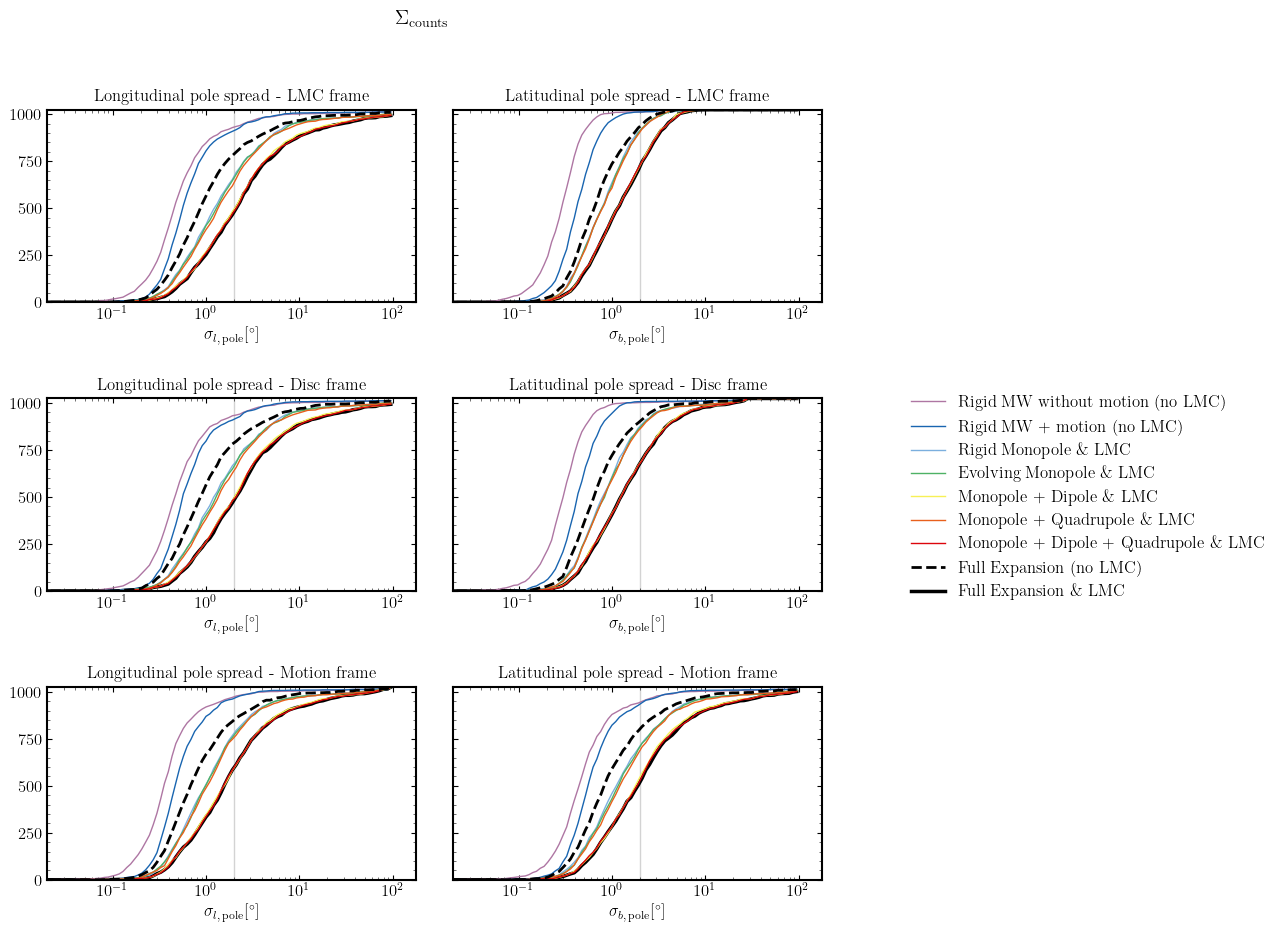

In [32]:
path = '/mnt/ceph/users/rbrooks/oceanus/analysis/stream-runs/combined-files/plotting_data/1024-dthalfMyr-10rpmin-75ramax/'
plotname= 'orbpole-spreads' 

orbpole_spreads(path, plotname, True, True)

In [14]:
# def plt_1dhists_reltostatic(path, plotname, savefig=False):
#     fig, ax = plt.subplots(2,3, figsize=(13,5.5))
#     plt.subplots_adjust(hspace=0.3, wspace=0.3)

# #     potentials = list(['rigid-mw.hdf5','rm-MWhalo-full-MWdisc-full-LMC.hdf5', 'em-MWhalo-full-MWdisc-full-LMC.hdf5',\
# #                            'md-MWhalo-full-MWdisc-full-LMC.hdf5', 'mq-MWhalo-full-MWdisc-full-LMC.hdf5', 'mdq-MWhalo-full-MWdisc-full-LMC.hdf5',\
# #                            'Full-MWhalo-MWdisc-LMC.hdf5', 'full-MWhalo-full-MWdisc-no-LMC.hdf5'])

# #     labels = list(['Rigid MW','Static Monopole', 'Evolving Monopole', 'Monopole + Dipole', 'Mono + Quadrupole', \
# #                    'Monopole + Dipole + Quadrupole', 'Full Expansion', 'Full Expansion (no LMC)'])
    
#     potentials = list(['rigid-mw.hdf5','static-mw.hdf5', 'md-MWhalo-full-MWdisc-full-LMC.hdf5', 'mq-MWhalo-full-MWdisc-full-LMC.hdf5',
#                         'Full-MWhalo-MWdisc-LMC.hdf5', 'full-MWhalo-full-MWdisc-no-LMC.hdf5'])

#     labels = list(['Rigid MW (no motion)','Rigid MW (with motion)', 'Monopole + Dipole \& LMC', 'Mono + Quadrupole \& LMC', 
#                 'Full Expansion \& LMC', 'Full Expansion (no LMC)'])
    
#     with h5py.File(path + potentials[0],'r') as file:

#             lengths_0 = np.array(file['lengths'])
#             widths_0 = np.array(file['widths'])
#             loc_veldis_0 = np.array(file['loc_veldis'])
#             track_deform_0 = np.array(file['track_deform'])
          
#             t_idx = -1
#             l_pole = np.array(file['pole_l'])[:,t_idx]
#             l_pole_std_0 = np.nanstd(l_pole, axis=1)
#             b_pole = np.array(file['pole_b'])[:,t_idx]
#             b_pole_std_0 = np.nanstd(b_pole, axis=1)

#     for j in range(0, len(potentials)): 

#         with h5py.File(path + potentials[j],'r') as file:
#             lengths = np.array(file['lengths'])
#             widths = np.array(file['widths'])
#             loc_veldis = np.array(file['loc_veldis'])
#             track_deform = np.array(file['track_deform'])
         
#             t_idx = -1
#             l_pole = np.array(file['pole_l'])[:,t_idx]
#             l_pole_std = np.nanstd(l_pole, axis=1)
#             b_pole = np.array(file['pole_b'])[:,t_idx]
#             b_pole_std = np.nanstd(b_pole, axis=1)

#         # lengths
#         plt.sca(ax[0,0])
#         h, bin_edges = np.histogram(lengths, bins=np.linspace(-1, 360, 10))
#         h_0, bin_edges_0 = np.histogram(lengths_0, bins=np.linspace(-1, 360, 10))
#         bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
#         plt.plot(bin_mids, h - h_0, label=labels[j])
#         plt.xlabel(r'$l\,[^{\circ}]$')
#         plt.ylabel('$\mathrm{N} - \mathrm{N_{0}}$')
#         plt.xlim(0, 360)
#         # plt.ylim(0.1,)
#         plt.legend(frameon=False, ncol=3, fontsize=12, bbox_to_anchor=(3.,1.35))

#         #widths
#         plt.sca(ax[1,0])
#         h, bin_edges = np.histogram(widths, bins=np.linspace(-0., 3, 15))
#         h_0, bin_edges_0 = np.histogram(widths_0, bins=np.linspace(-0., 3, 15))
#         bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
#         plt.plot(bin_mids, h - h_0)
#         plt.xlabel(r'$w\,[^{\circ}]$')
#         plt.ylabel('$\mathrm{N} - \mathrm{N_{0}}$')
#         plt.xlim(0,)
#         # plt.ylim(0.1,)

#         # velocity dispersion
#         plt.sca(ax[0,1])
#         h, bin_edges = np.histogram(loc_veldis, bins=np.linspace(-0, 20, 15))
#         h_0, bin_edges_0 = np.histogram(loc_veldis_0, bins=np.linspace(-0, 20, 15))
#         bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
#         plt.plot(bin_mids, h - h_0)
#         plt.xlabel(r'$\sigma_{v}\,[\mathrm{km}\,\mathrm{s}^{-1}]$')
#         plt.ylabel('$\mathrm{N} - \mathrm{N_{0}}$')
#         plt.xlim(0,20)
#         # plt.ylim(0.1,)
        
#         # track deformation
#         plt.sca(ax[1,1])
#         h, bin_edges = np.histogram(track_deform, bins=np.linspace(-0., 10, 25))
#         h_0, bin_edges_0 = np.histogram(track_deform_0, bins=np.linspace(-0, 10, 25))
#         bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
#         plt.plot(bin_mids, h - h_0)
#         plt.xlabel(r'$\bar{\delta}\,[^{\circ}]$')
#         plt.ylabel('$\mathrm{N} - \mathrm{N_{0}}$')
#         plt.xlim(-0.,)
#         # plt.ylim(0.1,)

#         # median l pole spread
#         plt.sca(ax[0,2])
#         h, bin_edges = np.histogram(l_pole_std, bins=np.linspace(0, 50, 30))
#         h_0, bin_edges_0 = np.histogram(l_pole_std_0, bins=np.linspace(0, 50, 30))
#         bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
#         plt.plot(bin_mids, h - h_0)
#         plt.xlabel(r'$\sigma_{l,\,{\mathrm{pole}}}[^{\circ}]$')
#         plt.ylabel('$\mathrm{N} - \mathrm{N_{0}}$')
#         plt.xlim(0,25)
#         # plt.ylim(0.1,)
        
#         # median b pole spread
#         plt.sca(ax[1,2])
#         h, bin_edges = np.histogram(b_pole_std, bins=np.linspace(0, 10, 20))
#         h_0, bin_edges_0 = np.histogram(b_pole_std_0, bins=np.linspace(0, 10, 20))
#         bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
#         plt.plot(bin_mids, h - h_0)
#         plt.xlabel(r'$\sigma_{b,\,{\mathrm{pole}}}[^{\circ}]$')
#         plt.ylabel('$\mathrm{N} - \mathrm{N_{0}}$')
#         plt.xlim(0,10)
#         # plt.ylim(0.1,)
        
#     if savefig==False:
#         return
#     elif savefig==True:
#         savepath = '/mnt/ceph/users/rbrooks/oceanus/analysis/figures/histograms/{}'.format(plotname)
#         print('* Saving figure at {}.pdf'.format(savepath))
#         plt.savefig(savepath)
#     # plt.close()

In [15]:
# path = '/mnt/ceph/users/rbrooks/oceanus/analysis/stream-runs/combined-files/plotting_data/1024-dthalfMyr-10rpmin-75ramax/'
# plotname= '1d-hists-reltorigid' 

# plt_1dhists_reltostatic(path, plotname, True)

In [62]:
def plt_1dhists_quadrants(path, plotname, savefig=False):
    
    potentials = list(['static-mwh-only.hdf5','rm-MWhalo-full-MWdisc-full-LMC.hdf5', 'em-MWhalo-full-MWdisc-full-LMC.hdf5',\
                           'md-MWhalo-full-MWdisc-full-LMC.hdf5', 'mq-MWhalo-full-MWdisc-full-LMC.hdf5', 'mdq-MWhalo-full-MWdisc-full-LMC.hdf5',\
                           'Full-MWhalo-MWdisc-LMC.hdf5', 'full-MWhalo-full-MWdisc-no-LMC.hdf5'])
    
    labels = list(['Static MW','Static Monopole', 'Evolving Monopole', 'Monopole + Dipole', 'Mono + Quadrupole', \
                   'Monopole + Dipole \n + Quadrupole', 'Full Expansion', 'Full Expansion \n (no LMC)'])
    
    quadrants = list(['Q1', 'Q2', 'Q3', 'Q4'])
    
    fig, ax = plt.subplots(6,len(potentials), figsize=(24,12))
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

    for j in range(len(potentials)): 

        with h5py.File(path + potentials[j],'r') as file:
            
            l_gc,b_gc  = np.array(file['l_gc']), np.array(file['b_gc'])
            mask_q1 = ( (l_gc > 0) & (l_gc < 180) & (b_gc > 0) & (b_gc < 90) )
            mask_q2 = ( (l_gc > 180) & (l_gc < 360) & (b_gc > 0) & (b_gc < 90) )
            mask_q3 = ( (l_gc > 0) & (l_gc < 180) & (b_gc > -90) & (b_gc < 0) )
            mask_q4 = ( (l_gc > 180) & (l_gc < 360) & (b_gc > -90) & (b_gc < 0) )
            
            masks = [mask_q1, mask_q2, mask_q3, mask_q4]
            
            lengths = np.array(file['lengths'])
            widths = np.array(file['widths'])
            loc_veldis = np.array(file['loc_veldis'])
            energies = np.array(file['energies'])
            track_deforms = np.array(file['track_deform'])
            Ls = np.array(file['L'])
            Lzs = np.array(file['Lz'])
            
            # print(track_deforms)
            
        for m in range(len(masks)):
        
            # lengths
            plt.sca(ax[0,j])
            h, bin_edges = np.histogram(lengths[masks[m]], bins=np.linspace(-1, 360, 10))
            bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
            plt.plot(bin_mids, h, label=quadrants[m])
            plt.xlabel(r'$l\,[^{\circ}]$')
            plt.xlim(0, 360)
            plt.ylim(0.1,)
            if j==0:
                plt.legend(frameon=False,fontsize=10)

            #widths
            plt.sca(ax[1,j])
            h, bin_edges = np.histogram(widths[masks[m]], bins=np.linspace(0, 3, 15))
            bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
            plt.plot(bin_mids, h)
            plt.xlabel(r'$w\,[^{\circ}]$', fontsize=14)
            plt.xlim(0,)
            plt.ylim(0.1,)

            # velocity dispersion
            plt.sca(ax[2,j])
            h, bin_edges = np.histogram(loc_veldis[masks[m]], bins=np.linspace(0, 20, 15))
            bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
            plt.plot(bin_mids, h)
            plt.xlabel(r'$\sigma_{v}\,[\mathrm{km}\,\mathrm{s}^{-1}]$', fontsize=14)
            plt.xlim(0,20)
            plt.ylim(0.1,)
            
            # track deforms
            plt.sca(ax[3,j])
            h, bin_edges = np.histogram(track_deforms[masks[m]], bins=np.linspace(-0., 10,15))
            bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
            plt.plot(bin_mids, h)
            plt.xlabel(r'$\bar{\delta}\,[^{\circ}]$', fontsize=14)
            plt.ylim(0.1,)

            # median energies
            plt.sca(ax[4,j])
            h, bin_edges = np.histogram(np.log10(-energies)[masks[m]], bins=np.linspace(4, 5.5, 25))
            bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
            plt.plot(bin_mids, h)
            plt.xlabel(r'$\log_{10}(\bar{E})\,[(\mathrm{km}\,\mathrm{s}^{-1})^2]$', fontsize=14)
            plt.xlim(4,5.5)
            plt.ylim(0.1,)

            # # median L
            # plt.sca(ax[4,j])
            # h, bin_edges = np.histogram(Ls[masks[m]], bins=np.linspace(0, 6500, 20))
            # bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
            # plt.plot(bin_mids, h)
            # plt.xlabel(r'$L\,[\mathrm{km}\,\mathrm{s}^{-1}\,\mathrm{kpc}]$', fontsize=14)
            # plt.ylim(0.1,)

            # median Lz
            plt.sca(ax[5,j])
            h, bin_edges = np.histogram(Lzs[masks[m]], bins=np.linspace(-6000, 6000, 20))
            bin_mids = (bin_edges[:-1] + bin_edges[1:]) /2
            plt.plot(bin_mids, h)
            plt.xlabel(r'$L_{z}\,[\mathrm{km}\,\mathrm{s}^{-1}\,\mathrm{kpc}]$', fontsize=14)
            plt.ylim(0.1,)
        
    #-------------------------------------------------------------------------------------
    ### Plot cosmetics
    #-------------------------------------------------------------------------------------
    for k in range(len(labels)):
        ax[0,k].set_title(labels[k], fontsize=14)
        
    for l in range(6):
        ax[l, 0].set_ylabel('Counts', fontsize=14)
        
    if savefig==False:
        return
    elif savefig==True:
        savepath = '/mnt/ceph/users/rbrooks/oceanus/analysis/figures/histograms/{}'.format(plotname)
        print('* Saving figure at {}.pdf'.format(savepath))
        plt.savefig(savepath)
    # plt.close()

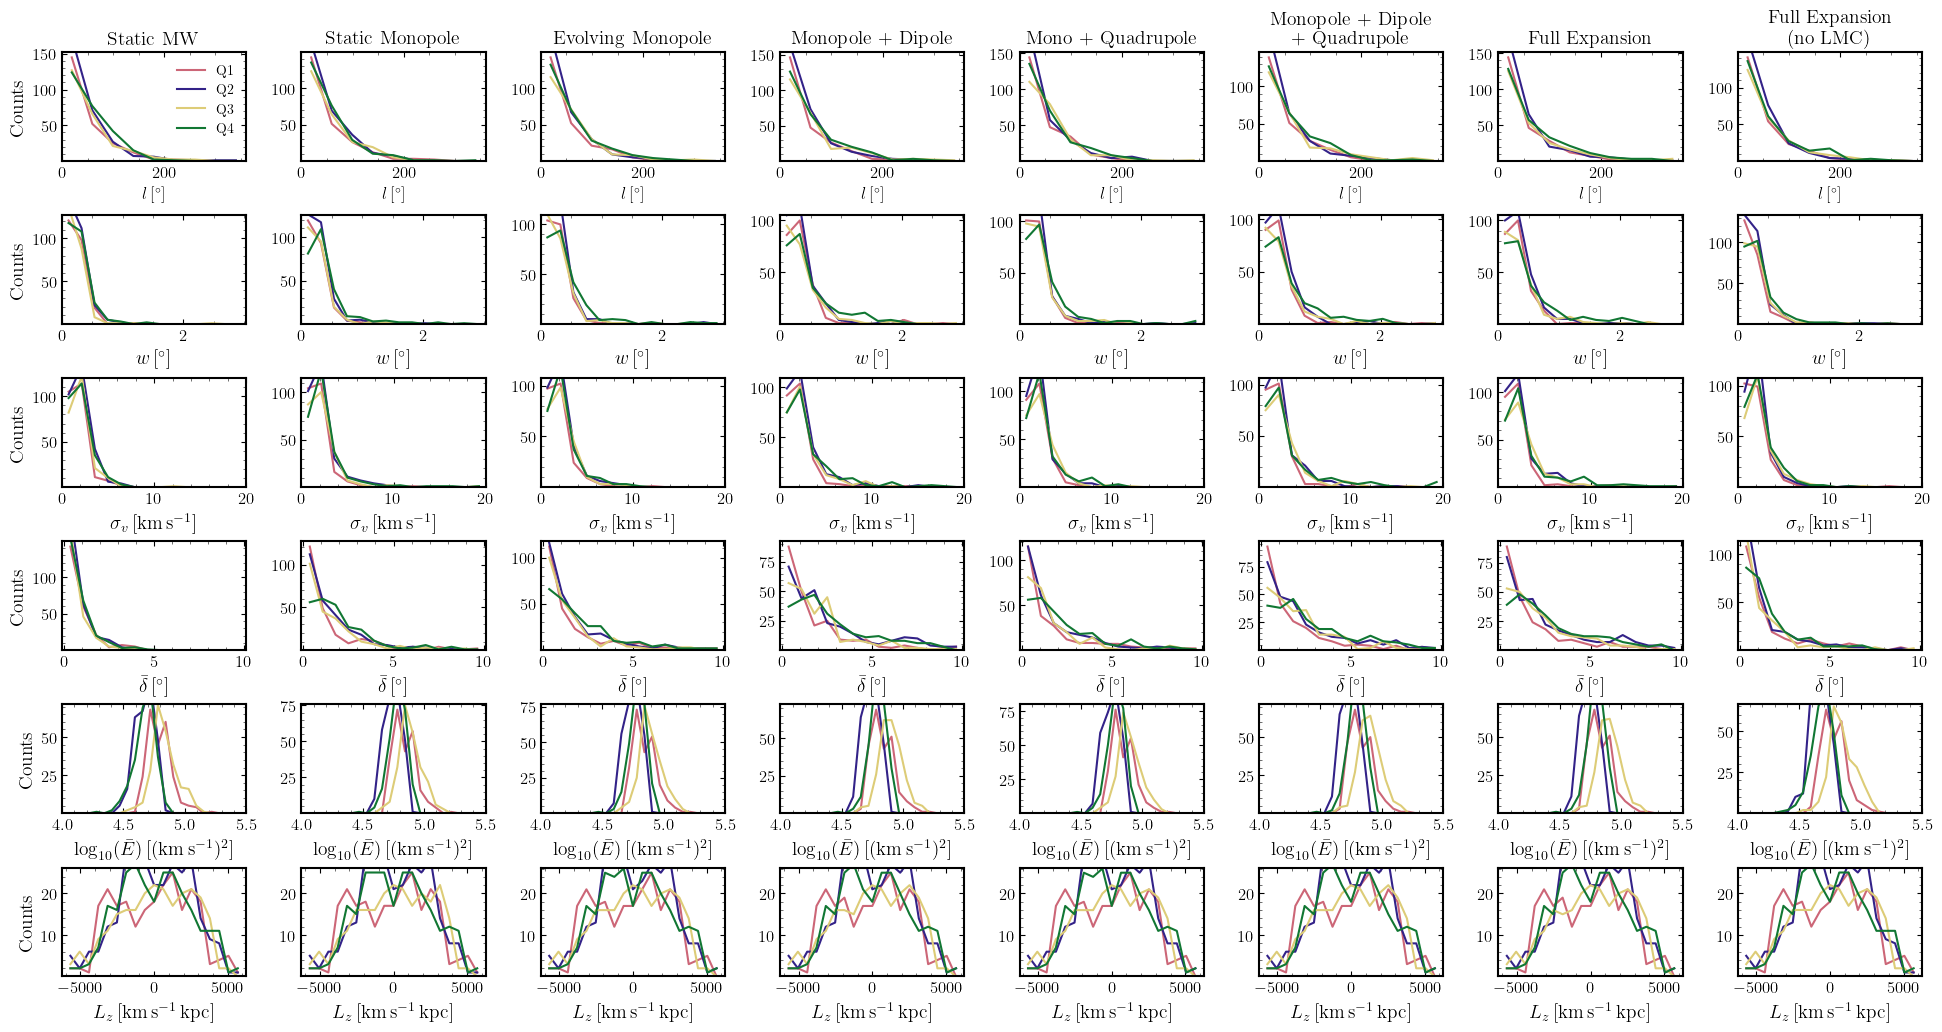

In [63]:
path = '/mnt/ceph/users/rbrooks/oceanus/analysis/stream-runs/combined-files/plotting_data/1024-dthalfMyr-10rpmin-75ramax/'
plotname= '1d-hists-quad' 

plt_1dhists_quadrants(path, plotname, False)

Calculating the proper motion misalignment angles

In [4]:
def lons_lats(pos, vel):
    prog = gd.PhaseSpacePosition(pos[0] * u.kpc, vel[0] * u.km / u.s)
    stream = gd.PhaseSpacePosition(pos[1:].T * u.kpc, vel[1:].T * u.km / u.s)
    R1 = Rotation.from_euler("z", -prog.spherical.lon.degree, degrees=True)
    R2 = Rotation.from_euler("y", prog.spherical.lat.degree, degrees=True)
    R_prog0 = R2.as_matrix() @ R1.as_matrix()  

    new_vxyz = R_prog0 @ prog.v_xyz
    v_angle = np.arctan2(new_vxyz[2], new_vxyz[1])
    R3 = Rotation.from_euler("x", -v_angle.to_value(u.degree), degrees=True)
    R = (R3 * R2 * R1).as_matrix()

    stream_rot = gd.PhaseSpacePosition(stream.data.transform(R))
    stream_sph = stream_rot.spherical
    lon = stream_sph.lon.wrap_at(180*u.deg).degree
    lat = stream_sph.lat.degree
    return lon, lat

In [5]:
def pm_misalignment(lons, xfs, vfs):
    
    # Compute percentiles
    lower_value = np.nanpercentile(lons, 5)
    upper_value = np.nanpercentile(lons, 95)
    
    # Filter away outlier particles
    lons_mainbody = lons[(lons >= lower_value) & (lons <= upper_value)]
    xfs_mainbody = xfs[1:][(lons >= lower_value) & (lons <= upper_value)] 
    vfs_mainbody = vfs[1:][(lons >= lower_value) & (lons <= upper_value)] 
    
    # Create bins
    lon_bins = np.linspace(np.nanmin(lons_mainbody), np.nanmax(lons_mainbody), 50)
    
    # Compute angular momentum vectors and normalise
    L = np.cross(xfs_mainbody, vfs_mainbody, axis=1)
    Lmag = np.linalg.norm(L, axis=1)
    L_norm = L.T/Lmag
    
    # Slice lons_mainbody into bins
    bin_indices = np.digitize(lons_mainbody, lon_bins)
    # Create a mask array for lon bins
    mask = np.zeros((len(lons_mainbody), len(lon_bins) - 1), dtype=bool)
    for i in range(1, len(lon_bins)):
        mask[:, i - 1] = (bin_indices == i)

    # Calculate median angular momentum vector and pole track vector for each bin
    Lnorm_bins = np.array([np.nanmedian(L_norm.T[m], axis=0) for m in mask.T])[1:]
    
    xs_bins = np.array([np.nanmedian(xfs_mainbody[m], axis=0) for m in mask.T])
    J_bins = np.array([np.cross(xs_bins[i], xs_bins[i+1]) for i in range(len(xs_bins) - 1)])
    Jmag_bins = np.linalg.norm(J_bins, axis=1)
    Jnorm_bins = (J_bins.T / Jmag_bins).T

    #Calculate the angluar separation by the dot product and arccos()
    L_dot_J_bins = np.einsum('ij,ij->i', Jnorm_bins, Lnorm_bins) 
    
    pm_angles_rad = np.arccos(L_dot_J_bins) * u.rad
    pm_angles_deg = pm_angles_rad.to(u.deg)
    
    med_pm_angle = np.nanmedian(pm_angles_deg)
    
    return med_pm_angle

In [6]:
path = '/mnt/ceph/users/rbrooks/oceanus/analysis/stream-runs/combined-files/1024-dthalfMyr-10rpmin-75ramax/rigid-mw.hdf5'
stream = 'stream_1'
with h5py.File(path,'r') as file:
        stream = file[stream]
        print(stream.keys())
        xfs = np.array(stream['positions'])[-1]
        vfs = np.array(stream['velocities'])[-1]
        
lon, lat = lons_lats(xfs, vfs)
print(pm_misalignment(lon, xfs, vfs))

<KeysViewHDF5 ['L', 'Lx', 'Lz', 'apocenter', 'av_lat', 'av_lon', 'energies', 'lengths', 'lmc_sep', 'loc_veldis', 'pericenter', 'pole_b', 'pole_l', 'positions', 'potential', 'progenitor-ics', 'progenitor-mass', 'progenitor-scale', 'times', 'track_deform', 'velocities', 'widths']>
18.68232726189661 deg


/tmp/ipykernel_1793415/1559661812.py:38: RuntimeWarning: invalid value encountered in arccos
  pm_angles_rad = np.arccos(L_dot_J_bins) * u.rad


Calculating the gradient of the track deviation metric

In [6]:
def grad_deviation(lons, lats):
    # Compute percentiles
    lower_value = np.nanpercentile(lons, 5)
    upper_value = np.nanpercentile(lons, 95)
    # Filter lons_mainbody
    lons_mainbody = lons[(lons >= lower_value) & (lons <= upper_value)]
    lats_mainbody = lats[(lons >= lower_value) & (lons <= upper_value)] 
    # Create bins
    lon_bins, Delta_phi1 = np.linspace(np.nanmin(lons_mainbody), np.nanmax(lons_mainbody), 50, retstep=True)
    # Slice lons_mainbody into bins
    bin_indices = np.digitize(lons_mainbody, lon_bins)
    # Create a mask array
    mask = np.zeros((len(lons_mainbody), len(lon_bins) - 1), dtype=bool)
    for i in range(1, len(lon_bins)):
        mask[:, i - 1] = (bin_indices == i)

    # Calculate gradient of the deviation for adjacent bins
    dev_bins = np.array([np.abs(np.nanmedian(lats_mainbody[m])) for m in mask.T])
    Delta_dev_bins = np.diff(dev_bins)
    ddev_dphi1 = Delta_dev_bins / Delta_phi1

    return np.percentile(ddev_dphi1, 95)

In [42]:
path = '/mnt/ceph/users/rbrooks/oceanus/analysis/stream-runs/combined-files/1024-dthalfMyr-10rpmin-75ramax/rigid-mw.hdf5'
stream = 'stream_0'
with h5py.File(path,'r') as file:
        stream = file[stream]
        # print(stream.keys())
        xfs = np.array(stream['positions'])[-1]
        vfs = np.array(stream['velocities'])[-1]
        
lon, lat = lons_lats(xfs, vfs)
print(grad_deviation(lon, lat))

0.2599698672745193
0.48333049236988007
1.705878409125069
[ 3.19755792e+00  1.08310684e+00  1.57800874e+00 -1.02401114e-01
 -2.39460052e-01 -5.80746045e+00  8.63951362e-01 -4.56096098e-02
  2.22581317e-02 -3.73505473e-01 -9.41916513e-02 -1.80851837e-01
 -5.01241375e-02 -5.56779691e-03  1.66792203e-01  7.70905240e-02
  3.56788493e-01  2.22651391e-01  7.91140485e-01  7.31209964e-01
  4.88603076e-01 -1.16759878e+00  1.50992622e-01  4.24412846e-02
  1.60601895e-01  1.72738250e-01 -2.23776727e+00  8.52937496e-01
 -6.75616780e-01  2.43377852e+00 -1.13066420e+00 -1.02559660e+00
  1.18373116e+00 -1.19877055e+00  2.61658956e-03  1.35575907e+00
  1.66878294e+00 -1.63213303e+00  3.31467633e-01 -5.82825912e-01
 -6.27108134e-01  1.72585289e+00  1.04123808e+00  4.92832045e-01
 -1.20867645e-01  2.30194127e-01  8.84746315e-01 -8.39862617e-01]


Orbital phase vs pm misalignment

In [156]:
path = '/mnt/ceph/users/rbrooks/oceanus/analysis/stream-runs/combined-files/plotting_data/16384-dt1Myr/rigid-mw.hdf5'
with h5py.File(path,'r') as file:
    print(file.keys())
    pericenters = np.array(file['pericenter'])
    apocenters = np.array(file['apocenter'])
    rgal = np.array(file['ds'])

    pms = np.array(file['pm_misalignment'])
    veldis = np.array(file['loc_veldis'])
        

<KeysViewHDF5 ['Eks', 'L', 'Lz', 'apocenter', 'b_gc', 'ds', 'energies', 'l_gc', 'lats', 'lengths', 'lmc_sep', 'loc_veldis', 'lons', 'mass', 'pericenter', 'pm_b', 'pm_l_cosb', 'pm_misalignment', 'pole_b', 'pole_l', 'sigma_pole_b', 'sigma_pole_l', 'sigmavlos', 'track_deform', 'vlos', 'widths']>


In [157]:
f = (rgal - pericenters) / (apocenters - pericenters)

e = (apocenters - pericenters) / (apocenters + pericenters)

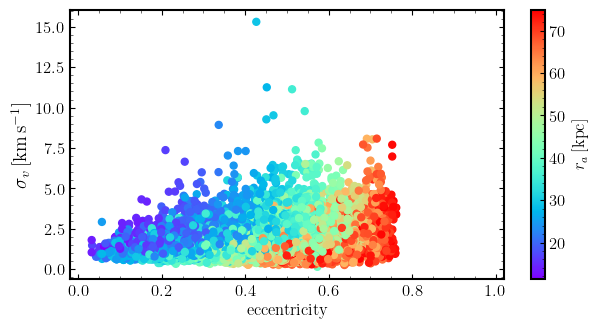

In [161]:
plt.figure(figsize=(7,3.5))
plt.scatter(e, veldis, c=apocenters, cmap='rainbow')
plt.xlim(-0.02,1.02)
# plt.ylim(-0.02,1.02)

# plt.xlabel(r'$\frac{r_{\mathrm{gal}} - r_p}{r_a - r_p}$', fontsize=16)
plt.ylabel(r'$\sigma_v\,[\mathrm{km}\,\mathrm{s}^{-1}]$', fontsize=14)
plt.xlabel('eccentricity')

cbar=plt.colorbar()
cbar.set_label(r'$r_a\,[\mathrm{kpc}]$')
# cbar.set_label('$\sigma_v\,[\mathrm{km}\,\mathrm{s}^{-1}]$')
# cbar.set_label(r'$\vartheta\,[^{\circ}]$')


# plt.annotate('Pericenter', (-0.0,.9))
# plt.annotate('Apocenter', (.82,.9))

# plt.savefig('figures/misc/orbphase-ecc-cbar-pms')

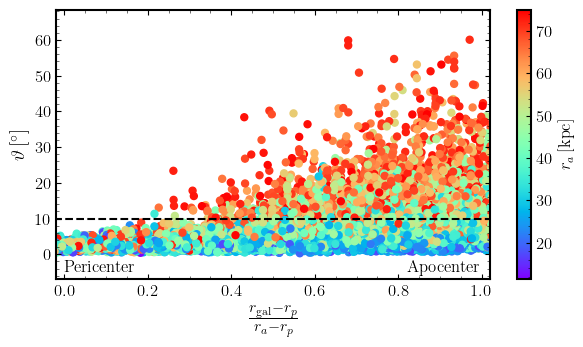

In [77]:
plt.figure(figsize=(7,3.5))
plt.scatter(f, pms, c=apocenters, cmap='rainbow', vmax=75)
plt.xlim(-0.02,1.02)
plt.ylim(-7,)

plt.xlabel(r'$\frac{r_{\mathrm{gal}} - r_p}{r_a - r_p}$', fontsize=16)
plt.ylabel(r'$\vartheta\,[^{\circ}]$', fontsize=14)

cbar=plt.colorbar()
cbar.set_label(r'$r_a\,[\mathrm{kpc}]$')


plt.annotate('Pericenter', (-0.0,-5))
plt.annotate('Apocenter', (.82,-5))

plt.hlines(10, -0.2, 1.2, ls='dashed', colors='k')

# plt.savefig('figures/misc/orbphase-pms')

In [82]:
np.mean(apocenters[pms < 10]), np.mean(apocenters[pms > 10])

(38.086452779450845, 56.617297974591835)